[+] Load data....
1
0
1
[+] Load data finished
[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]
19
48


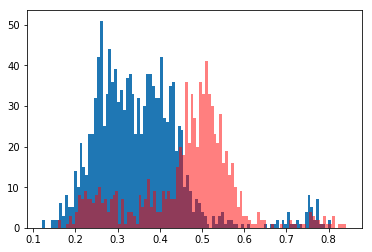

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from imageio import imread
from skimage.transform import resize
from scipy.spatial import distance
from keras.models import load_model
import pandas as pd
from tqdm import tqdm

# def face_distance(face_encodings, labels, face_to_compare, tolerance):
#     if len(face_encodings) == 0:
#         return np.empty((0))

#     preds = np.linalg.norm(face_encodings - face_to_compare, axis=1)
#     sort_prob = np.argsort(preds)
#     if preds[sort_prob[0]] > tolerance:
#         return -1
#     return labels[sort_prob[0]]

# def compare_faces(known_face_encodings, labels, face_encoding_to_check, tolerance=0.6):
#     return face_distance(known_face_encodings, labels, face_encoding_to_check, tolerance)

def load_features(src):
    print("[+] Load data....")
    data = []
    label = []
    same_label = [[]]
    k = 0
    count = 0
    with open(src, "r") as file:
        for i,line in enumerate(file):
            img_path = line[:-1]
            #print("[+] Read image  : ", img_path," id : ", i)
            if os.path.isfile(img_path) and img_path.find(".jpg") != -1:            
                save_path = img_path.replace("images", "features").replace(".jpg", ".npy")        
                if os.path.isfile(save_path):
                    lb = save_path.split("/")[1]
                    # lb1 = lb.split(".")[1]
                    # print (lb)
                    # print(save_path)
                    data.append(np.load(save_path))
                    label.append(lb)
                    if (count == 0):
                        prelb = lb
                    if (lb == prelb):
                        same_label[k].append(count)
                        count += 1
                    else:
                        print(prelb)
                        prelb = lb
                        k += 1
                        same_label.append([])
                        same_label[k].append(count)
                        count += 1
                        
    print("[+] Load data finished")
    return np.array(data), label, same_label

def draw_histogram(src):
    data, label, label2idx = load_features(src)

    match_distances = []
    print(label2idx[1])
    for i in range(2):
        ids = label2idx[i]
        print(len(ids))
        distances = []
        for j in range(len(ids) - 1):
            for k in range(j + 1, len(ids)):
                distances.append(distance.euclidean(data[ids[j]], data[ids[k]]))
        match_distances.extend(distances)

    unmatch_distances = []
    for i in range(2):
        ids = label2idx[i]
        distances = []
        for j in range(400):
            idx = np.random.randint(data.shape[0])
            while idx in label2idx[i]:
                idx = np.random.randint(data.shape[0])
            distances.append(distance.euclidean(data[ids[np.random.randint(len(ids))]], data[idx]))
        unmatch_distances.extend(distances)
    
    _,_,_=plt.hist(match_distances,bins=100)
    _,_,_=plt.hist(unmatch_distances,bins=100,fc=(1, 0, 0, 0.5))

train = 'db/db1/combine.txt'
draw_histogram(train)